# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
disease_types=['COVID', 'non-COVID']
data_dir = "/home/shyam/Downloads/ctscan"
train_dir = os.path.join(data_dir)

In [ ]:
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head(20)

,File,DiseaseID,Disease Type
0,COVID/Covid (1073).png,0,COVID
1,COVID/Covid (593).png,0,COVID
2,COVID/Covid (768).png,0,COVID
3,COVID/Covid (797).png,0,COVID
4,COVID/Covid (207).png,0,COVID
5,COVID/Covid (1225).png,0,COVID
6,COVID/Covid (876).png,0,COVID
7,COVID/Covid (400).png,0,COVID
8,COVID/Covid (408).png,0,COVID
9,COVID/Covid (127).png,0,COVID


In [ ]:
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train)) # Reset indices
train.head(20)

,File,DiseaseID,Disease Type
0,COVID/Covid (986).png,0,COVID
1,COVID/Covid (49).png,0,COVID
2,non-COVID/Non-Covid (1074).png,1,non-COVID
3,non-COVID/Non-Covid (537).png,1,non-COVID
4,COVID/Covid (1251).png,0,COVID
5,non-COVID/Non-Covid (444).png,1,non-COVID
6,COVID/Covid (242).png,0,COVID
7,non-COVID/Non-Covid (543).png,1,non-COVID
8,non-COVID/Non-Covid (436).png,1,non-COVID
9,COVID/Covid (1064).png,0,COVID


In [ ]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.40.0
    Uninstalling tqdm-4.40.0:
      Successfully uninstalled tqdm-4.40.0


In [ ]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
df = pd.DataFrame(train)

In [ ]:
!pip install tqdm==4.40.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.40.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires tqdm>=4.48.2, but you have tqdm 4.40.0 which is incompatible.


In [ ]:
!pip install --upgrade ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas_profiling as pp
pp.ProfileReport(train)

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

# COVID:0              
# NON-COVID:1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


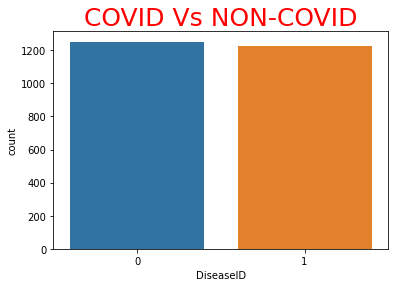

<Figure size 864x864 with 0 Axes>

In [ ]:
sns.countplot(train['DiseaseID'])
plt.title('COVID Vs NON-COVID',fontsize=25, color='red')
plt.figure(figsize=(12, 12))

plt.show()

Text(0.5, 0.98, 'COVID')

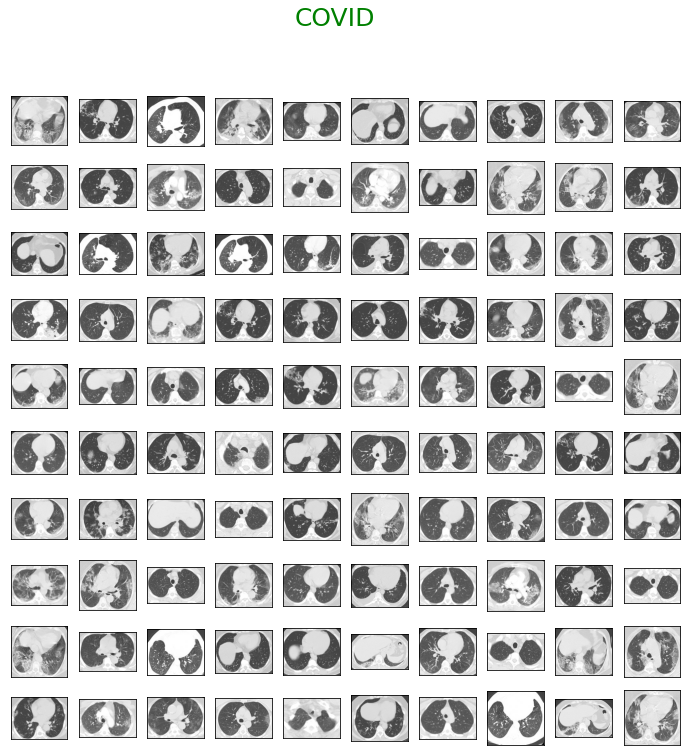

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('COVID', 10, 10)
plt.suptitle('COVID',color='Green',fontsize=25)

Text(0.5, 0.98, 'NON-COVID')

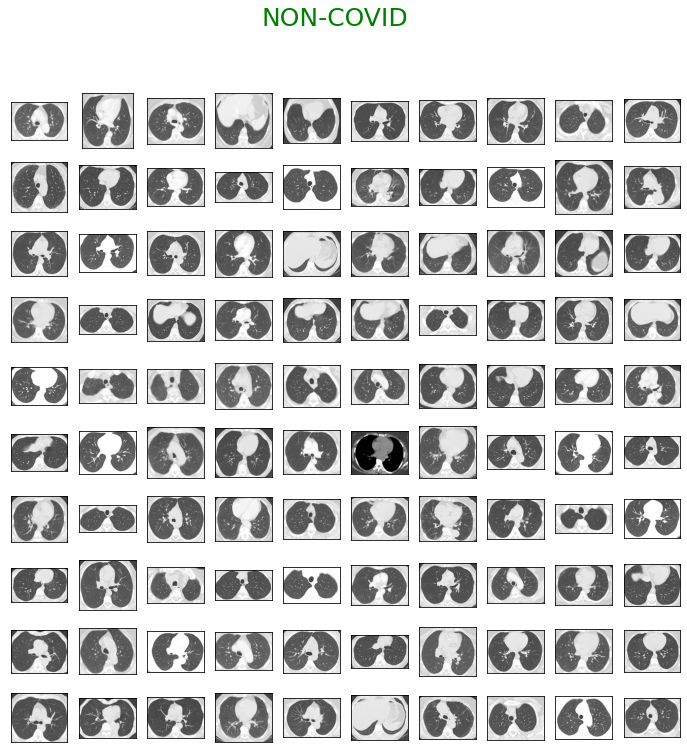

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('non-COVID', 10, 10)
plt.suptitle('NON-COVID',color='Green',fontsize=25)

In [ ]:
IMAGE_SIZE = 64
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [ ]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
# Normalize the data
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

2481it [00:05, 418.11it/s]

Train Shape: (2481, 64, 64, 3)


In [ ]:
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=2)
print(Y_train.shape)

(2481, 2)


In [ ]:
BATCH_SIZE = 64

# Split the train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state=SEED)


In [ ]:
print(f'X_train:',X_train.shape)
print(f'X_val:',X_val.shape)
print(f'Y_train:',Y_train.shape)
print(f'Y_val:',Y_val.shape)

X_train: (1984, 64, 64, 3)
X_val: (497, 64, 64, 3)
Y_train: (1984, 2)
Y_val: (497, 2)


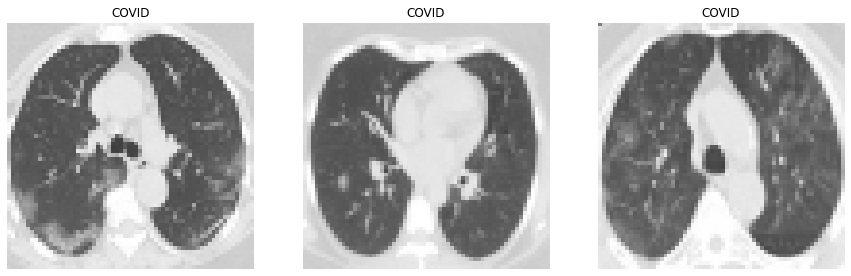

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(disease_types[np.argmax(Y_train[i])])

In [ ]:
EPOCHS = 150
SIZE=64
N_ch=3

In [ ]:
def build_resnet50():
    resnet50 = ResNet50(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)

    x = resnet50(x)

    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)


    # model
    model = Model(input,output)

    optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
model = build_resnet50()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_learning_rate=1e-4)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 3)         84        
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544

/usr/local/lib/python3.6/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
31/31 [==============================] - 61s 2s/step - loss: 1.2127 - accuracy: 0.5318 - val_loss: 0.9894 - val_accuracy: 0.5513

Epoch 00001: val_loss improved from inf to 0.98940, saving model to model.h5


/usr/local/lib/python3.6/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/150
31/31 [==============================] - 57s 2s/step - loss: 0.9994 - accuracy: 0.6064 - val_loss: 0.7604 - val_accuracy: 0.5513

Epoch 00002: val_loss improved from 0.98940 to 0.76041, saving model to model.h5
Epoch 3/150
31/31 [==============================] - 57s 2s/step - loss: 0.9266 - accuracy: 0.6230 - val_loss: 1.3552 - val_accuracy: 0.5513

Epoch 00003: val_loss did not improve from 0.76041
Epoch 4/150
31/31 [==============================] - 57s 2s/step - loss: 0.8126 - accuracy: 0.6689 - val_loss: 1.8119 - val_accuracy: 0.5513

Epoch 00004: val_loss did not improve from 0.76041
Epoch 5/150
31/31 [==============================] - 57s 2s/step - loss: 0.7486 - accuracy: 0.6694 - val_loss: 3.5732 - val_accuracy: 0.5513

Epoch 00005: val_loss did not improve from 0.76041
Epoch 6/150
31/31 [==============================] - 57s 2s/step - loss: 0.6788 - accuracy: 0.6991 - val_loss: 2.9898 - val_accuracy: 0.5513

Epoch 00006: ReduceLROnPlateau reducing learning rate to

Epoch 42/150
31/31 [==============================] - 57s 2s/step - loss: 0.3386 - accuracy: 0.8553 - val_loss: 0.3174 - val_accuracy: 0.8692

Epoch 00042: val_loss improved from 0.31847 to 0.31741, saving model to model.h5
Epoch 43/150
31/31 [==============================] - 57s 2s/step - loss: 0.3125 - accuracy: 0.8679 - val_loss: 0.3287 - val_accuracy: 0.8551

Epoch 00043: val_loss did not improve from 0.31741
Epoch 44/150
31/31 [==============================] - 57s 2s/step - loss: 0.3073 - accuracy: 0.8725 - val_loss: 0.2948 - val_accuracy: 0.8652

Epoch 00044: val_loss improved from 0.31741 to 0.29483, saving model to model.h5
Epoch 45/150
31/31 [==============================] - 57s 2s/step - loss: 0.3037 - accuracy: 0.8745 - val_loss: 0.3229 - val_accuracy: 0.8712

Epoch 00045: val_loss did not improve from 0.29483
Epoch 46/150
31/31 [==============================] - 57s 2s/step - loss: 0.3121 - accuracy: 0.8720 - val_loss: 0.3115 - val_accuracy: 0.8612

Epoch 00046: val_loss


Epoch 00081: val_loss improved from 0.21475 to 0.21319, saving model to model.h5
Epoch 82/150
31/31 [==============================] - 58s 2s/step - loss: 0.2430 - accuracy: 0.8957 - val_loss: 0.2144 - val_accuracy: 0.9256

Epoch 00082: val_loss did not improve from 0.21319
Epoch 83/150
31/31 [==============================] - 58s 2s/step - loss: 0.2579 - accuracy: 0.8911 - val_loss: 0.2337 - val_accuracy: 0.9014

Epoch 00083: val_loss did not improve from 0.21319
Epoch 84/150
31/31 [==============================] - 59s 2s/step - loss: 0.2542 - accuracy: 0.8931 - val_loss: 0.2285 - val_accuracy: 0.9074

Epoch 00084: val_loss did not improve from 0.21319
Epoch 85/150
31/31 [==============================] - 58s 2s/step - loss: 0.2485 - accuracy: 0.8947 - val_loss: 0.2089 - val_accuracy: 0.9235

Epoch 00085: val_loss improved from 0.21319 to 0.20889, saving model to model.h5
Epoch 86/150
31/31 [==============================] - 57s 2s/step - loss: 0.2417 - accuracy: 0.8972 - val_loss: 

31/31 [==============================] - 63s 2s/step - loss: 0.2438 - accuracy: 0.9022 - val_loss: 0.2134 - val_accuracy: 0.9054

Epoch 00120: val_loss did not improve from 0.20534
Epoch 121/150
31/31 [==============================] - 63s 2s/step - loss: 0.2332 - accuracy: 0.9012 - val_loss: 0.2163 - val_accuracy: 0.9135

Epoch 00121: ReduceLROnPlateau reducing learning rate to 2.0346689598227383e-05.

Epoch 00121: val_loss did not improve from 0.20534
Epoch 122/150
31/31 [==============================] - 60s 2s/step - loss: 0.2556 - accuracy: 0.8911 - val_loss: 0.2154 - val_accuracy: 0.9074

Epoch 00122: val_loss did not improve from 0.20534
Epoch 123/150
31/31 [==============================] - 61s 2s/step - loss: 0.2358 - accuracy: 0.9042 - val_loss: 0.2151 - val_accuracy: 0.9115

Epoch 00123: val_loss did not improve from 0.20534
Epoch 124/150
31/31 [==============================] - 61s 2s/step - loss: 0.2525 - accuracy: 0.8947 - val_loss: 0.2193 - val_accuracy: 0.9135

Epoch 00

In [ ]:
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

16/16 [==============================] - 1s 82ms/step - loss: 0.2215 - accuracy: 0.9095
Final Loss: 0.22152909636497498, Final Accuracy: 0.909456729888916


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list(
 name='test',
colors=['green','red','green','red']
)

In [ ]:
def plot_confusion_matrix(normalize):
    Y_pred = model.predict(X_val)
    Y_pred = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_val, axis=1)
    cm = confusion_matrix(Y_true, Y_pred, normalize=normalize)
    plt.figure(figsize=(12, 12))
    ax = sns.heatmap(cm, cmap=cmap, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
    ax.set_ylabel('Actual', fontsize=40)
    ax.set_xlabel('Predicted', fontsize=40)


Confusion Matrix without Normalization


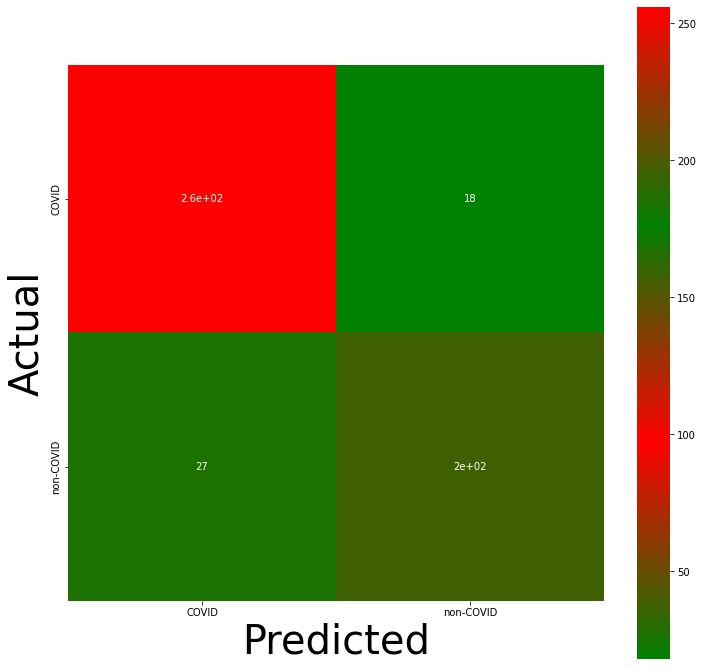

In [ ]:
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

Confusion Matrix with Normalized Values


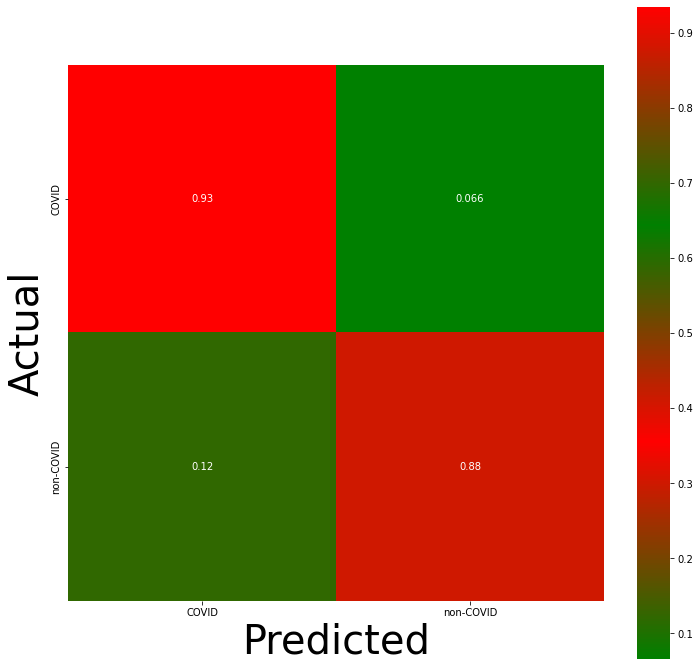

In [ ]:
print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       274
           1       0.92      0.88      0.90       223

    accuracy                           0.91       497
   macro avg       0.91      0.91      0.91       497
weighted avg       0.91      0.91      0.91       497



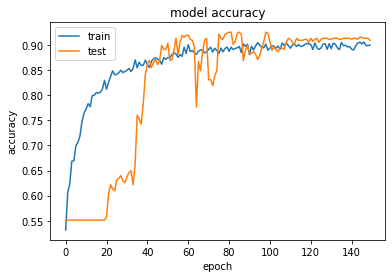

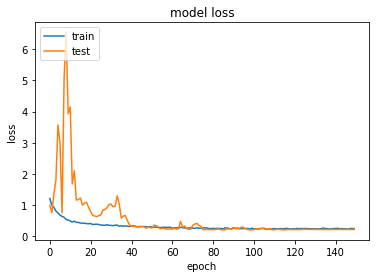

In [ ]:
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[0.99696785 0.00303217]


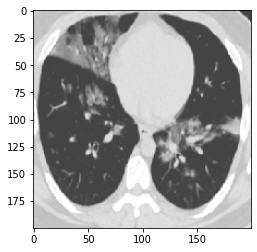

Prediction: Covid-19


In [ ]:
from skimage import io
from keras.preprocessing import image
img = image.load_img("/home/shyam/Downloads/ctscan/COVID/Covid (28).png", grayscale=False, target_size=(64, 64))
show_img=image.load_img("/home/shyam/Downloads/ctscan/COVID/Covid (28).png", grayscale=False, target_size=(200, 200))
disease_class=['Covid-19','Non Covid-19']
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)

print('Prediction:',disease_class[ind])

[0.11544413 0.8845559 ]


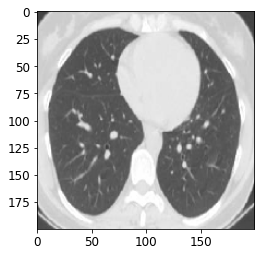

Prediction: Non Covid-19


In [ ]:
from skimage import io
from keras.preprocessing import image
img = image.load_img("/home/shyam/Downloads/ctscan/non-COVID/Non-Covid (1178).png", grayscale=False, target_size=(64, 64))
show_img=image.load_img("/home/shyam/Downloads/ctscan/non-COVID/Non-Covid (1178).png", grayscale=False, target_size=(200, 200))
disease_class=['Covid-19','Non Covid-19']
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)

print('Prediction:',disease_class[ind])

In [ ]:
Y_pred = model.predict(X_val)
Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

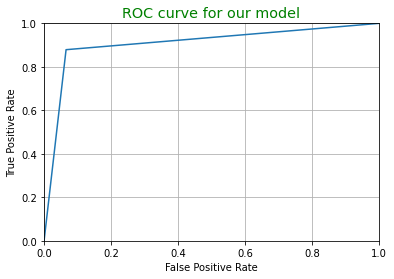

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_true, Y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model', color="green")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)


In [ ]:
Y_pred1 = model.predict(X_val)

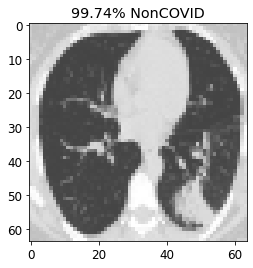

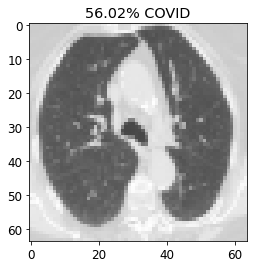

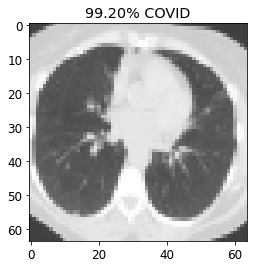

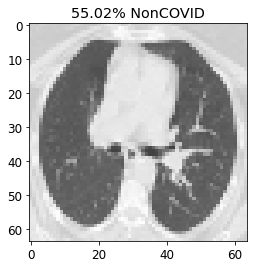

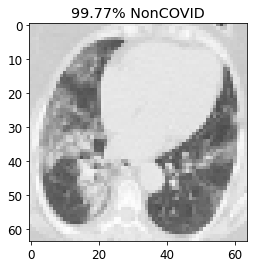

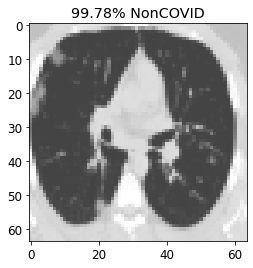

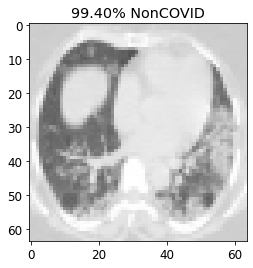

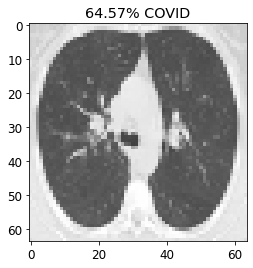

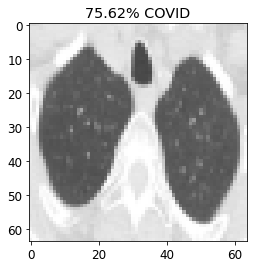

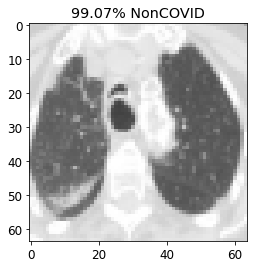

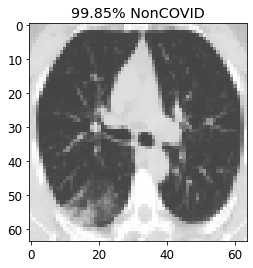

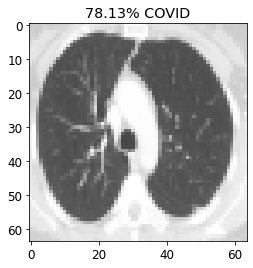

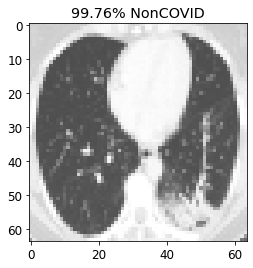

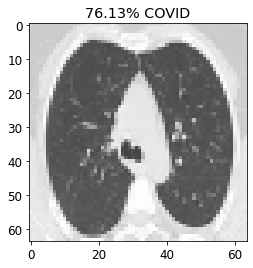

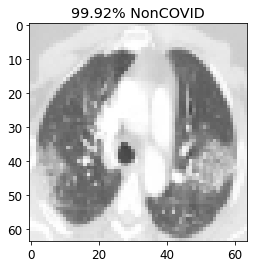

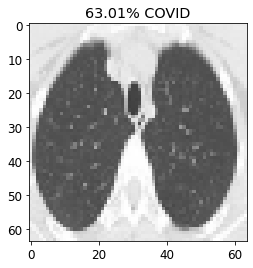

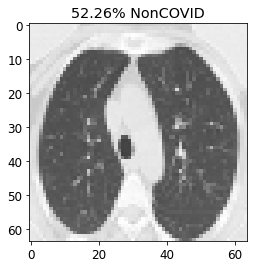

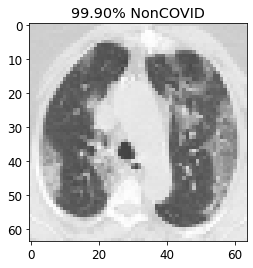

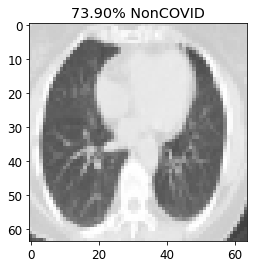

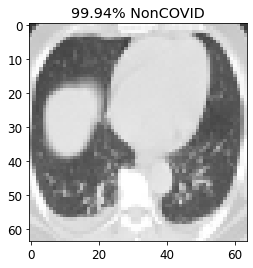

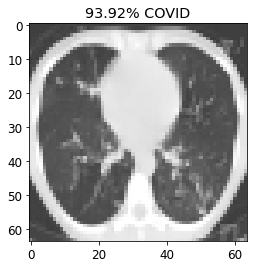

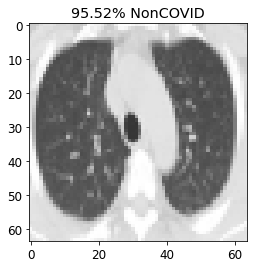

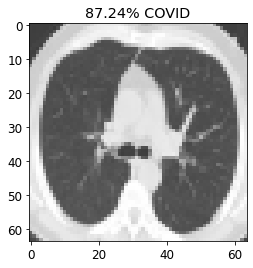

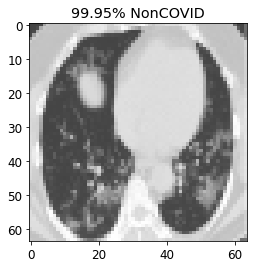

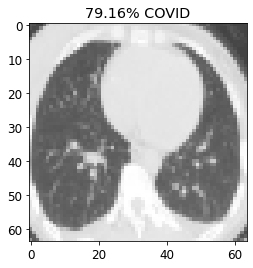

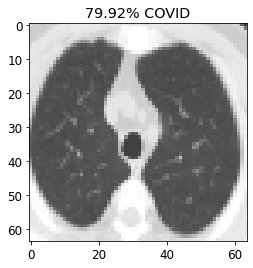

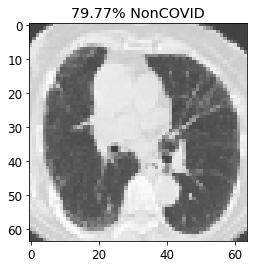

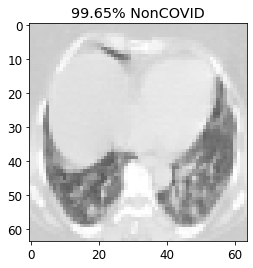

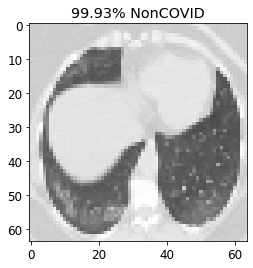

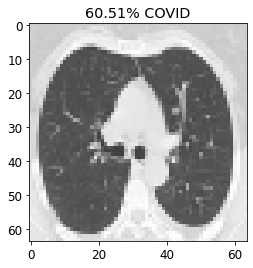

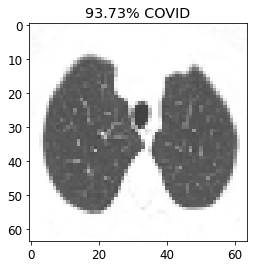

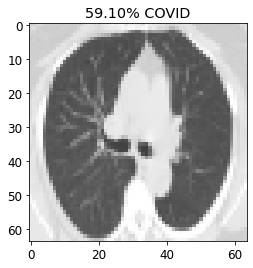

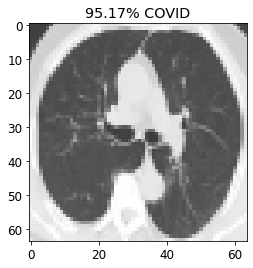

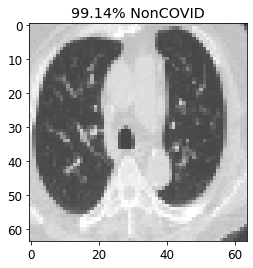

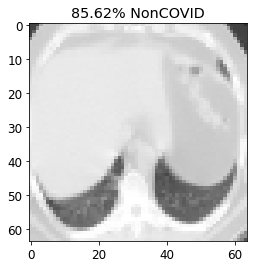

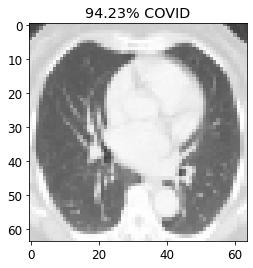

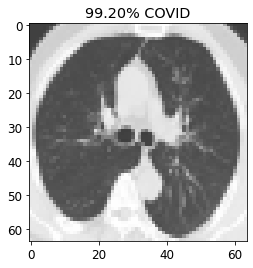

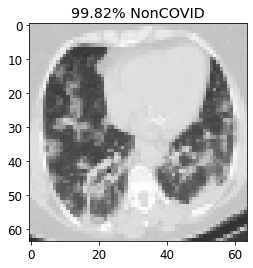

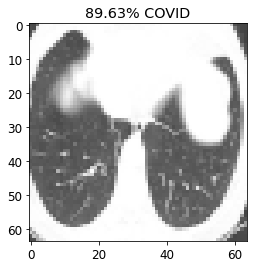

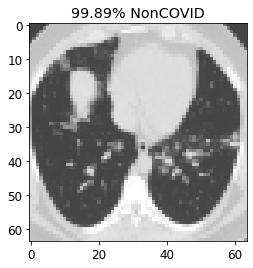

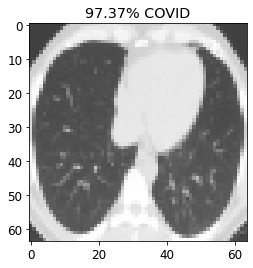

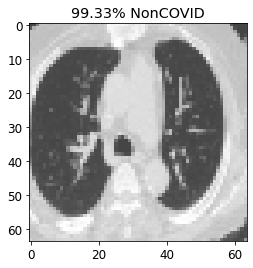

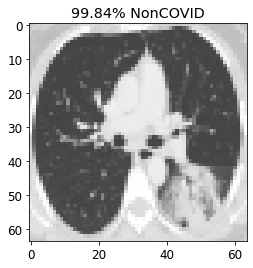

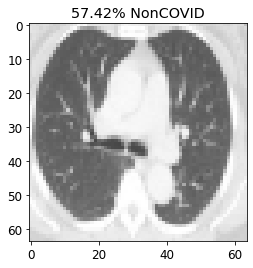

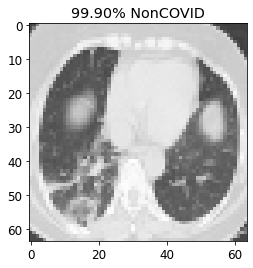

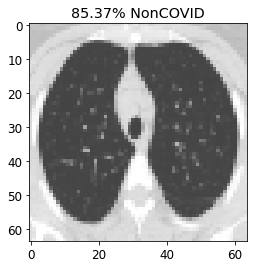

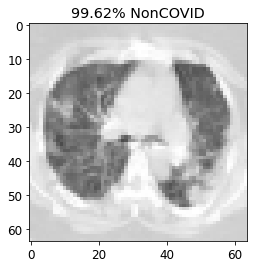

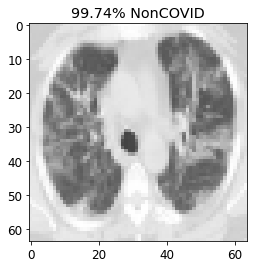

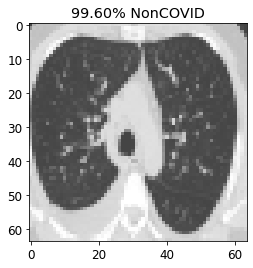

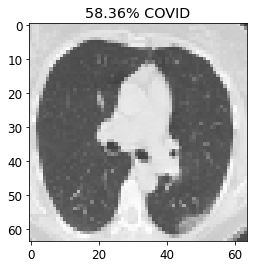

In [ ]:
prediction=Y_pred1[0:50]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_val[index])
  plt.show()